Command history:

    %run parse_log.py logs/6players/mixed outlogs/6players/mixed parsed.hdf
    %run parse_log.py logs/6players/better outlogs/6players/better parsed.hdf
    %run parse_log.py logs/6players/chron outlogs/6players/chron parsed.hdf
    %run parse_log.py logs/6players/stupid outlogs/6players/stupid parsed.hdf
    
    %run parse_log.py logs/5players/mixed outlogs/5players/mixed parsed.hdf
    %run parse_log.py logs/5players/better outlogs/5players/better parsed.hdf
    %run parse_log.py logs/5players/chron outlogs/5players/chron parsed.hdf
    %run parse_log.py logs/5players/stupid outlogs/5players/stupid parsed.hdf
    
    %run parse_log.py logs/4players/mixed outlogs/4players/mixed parsed.hdf
    %run parse_log.py logs/4players/better outlogs/4players/better parsed.hdf
    %run parse_log.py logs/4players/chron outlogs/4players/chron parsed.hdf
    %run parse_log.py logs/4players/stupid outlogs/4players/stupid parsed.hdf
    
    %run parse_log.py logs/3players/mixed outlogs/3players/mixed parsed.hdf
    %run parse_log.py logs/3players/better outlogs/3players/better parsed.hdf
    %run parse_log.py logs/3players/chron outlogs/3players/chron parsed.hdf
    %run parse_log.py logs/3players/stupid outlogs/3players/stupid parsed.hdf
    %run parse_log.py logs/3players/chronvbetter outlogs/3players/chronvbetter parsed.hdf

In [8]:
%run parse_log.py logs/ outlogs/test parsed

logs\mylog0.game4.log list index out of range
logs\mylog1.game15.log list index out of range
logs\mylog2.game9.log list index out of range
logs\mylog3.game20.log list index out of range


In [7]:
df = pd.read_hdf("outlogs/few/parsed0.hdf")
df.sample(10)

,Player 0 Alaska,Player 0 Northwest Territories,Player 0 Greenland,Player 0 Alberta,Player 0 Ontario,Player 0 Quebec,Player 0 Western United States,Player 0 Eastern United States,Player 0 Mexico,Player 0 Venezuala,...,Player 2 player_average_boundary_fortifications,Player 0 player_connected_components,Player 1 player_connected_components,Player 2 player_connected_components,winner,Player 1 soft score,Second,Player 0 soft score,Third,Player 2 soft score
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.500000,1.0,4.0,3.0,1,1,0,0.5,2,0.333333
95,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.833333,6.0,5.0,5.0,1,1,0,0.5,2,0.333333
40,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.000000,4.0,6.0,4.0,1,1,0,0.5,2,0.333333
70,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.300000,4.0,6.0,6.0,1,1,0,0.5,2,0.333333
48,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.333333,4.0,6.0,5.0,1,1,0,0.5,2,0.333333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,1.0,2.0,0.0,1,1,0,0.5,2,0.333333
121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.800000,3.0,5.0,4.0,1,1,0,0.5,2,0.333333
72,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.400000,4.0,6.0,6.0,1,1,0,0.5,2,0.333333
24,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,2.0,5.0,4.0,1,1,0,0.5,2,0.333333
10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.0,5.0,1.0,1,1,0,0.5,2,0.333333


In [1]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix

from scipy.special import softmax

import itertools
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1_l2
import keras

Using TensorFlow backend.
C:\Users\lodeo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lodeo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\lodeo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\lodeo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
 #https://dfrieds.com/machine-learning/visual-introduction-classification-logistic-regression-python.html
def plot_cm(cm, num_players, title, cmap=plt.cm.Blues):
    classes = ["Player {}".format(i) for i in range(1,num_players+1)]
    
    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(num_players)
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", 
                 fontsize=23, color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True winner', labelpad=12)
    plt.xlabel('Predicted winner', labelpad=12)
    plt.tight_layout()
    plt.show()

200th turn dataset:

Train on 13085 samples, validate on 3272 samples
Epoch 1/30
13085/13085 [==============================] - 0s 36us/step - loss: 6.0413 - accuracy: 0.2065 - val_loss: 4.6396 - val_accuracy: 0.2653
Epoch 2/30
13085/13085 [==============================] - 0s 25us/step - loss: 4.0777 - accuracy: 0.2997 - val_loss: 3.6896 - val_accuracy: 0.3246
Epoch 3/30
13085/13085 [==============================] - 0s 24us/step - loss: 3.4732 - accuracy: 0.3331 - val_loss: 3.2586 - val_accuracy: 0.3469
Epoch 4/30
13085/13085 [==============================] - 0s 22us/step - loss: 3.0940 - accuracy: 0.3510 - val_loss: 2.9091 - val_accuracy: 0.3649
Epoch 5/30
13085/13085 [==============================] - 0s 24us/step - loss: 2.7749 - accuracy: 0.3695 - val_loss: 2.6178 - val_accuracy: 0.3878
Epoch 6/30
13085/13085 [==============================] - 0s 24us/step - loss: 2.5123 - accuracy: 0.3885 - val_loss: 2.3857 - val_accuracy: 0.4163
Epoch 7/30
13085/13085 [========================

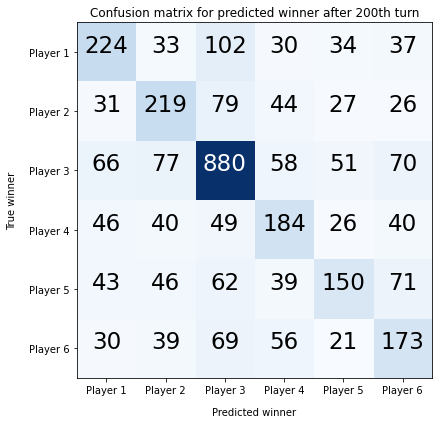

300th turn dataset:
Train on 7548 samples, validate on 1888 samples
Epoch 1/30
7548/7548 [==============================] - 0s 38us/step - loss: 8.3125 - accuracy: 0.2152 - val_loss: 7.6940 - val_accuracy: 0.2150
Epoch 2/30
7548/7548 [==============================] - 0s 20us/step - loss: 7.0116 - accuracy: 0.2269 - val_loss: 6.4556 - val_accuracy: 0.2225
Epoch 3/30
7548/7548 [==============================] - 0s 18us/step - loss: 5.8984 - accuracy: 0.2505 - val_loss: 5.4004 - val_accuracy: 0.2484
Epoch 4/30
7548/7548 [==============================] - 0s 18us/step - loss: 4.9591 - accuracy: 0.2901 - val_loss: 4.5257 - val_accuracy: 0.2871
Epoch 5/30
7548/7548 [==============================] - 0s 19us/step - loss: 4.2051 - accuracy: 0.3476 - val_loss: 3.8462 - val_accuracy: 0.3459
Epoch 6/30
7548/7548 [==============================] - 0s 18us/step - loss: 3.6402 - accuracy: 0.4020 - val_loss: 3.3717 - val_accuracy: 0.4179
Epoch 7/30
7548/7548 [==============================] - 0s 19u

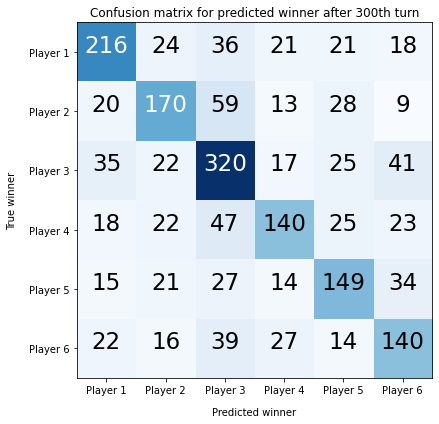

350th turn dataset:
Train on 4953 samples, validate on 1239 samples
Epoch 1/30
4953/4953 [==============================] - 0s 50us/step - loss: 12.4430 - accuracy: 0.3182 - val_loss: 11.6522 - val_accuracy: 0.3293
Epoch 2/30
4953/4953 [==============================] - 0s 20us/step - loss: 11.1452 - accuracy: 0.3146 - val_loss: 10.4924 - val_accuracy: 0.3261
Epoch 3/30
4953/4953 [==============================] - 0s 20us/step - loss: 10.0984 - accuracy: 0.3077 - val_loss: 9.5455 - val_accuracy: 0.3285
Epoch 4/30
4953/4953 [==============================] - 0s 19us/step - loss: 9.2171 - accuracy: 0.3063 - val_loss: 8.7284 - val_accuracy: 0.3261
Epoch 5/30
4953/4953 [==============================] - 0s 19us/step - loss: 8.4267 - accuracy: 0.3119 - val_loss: 7.9655 - val_accuracy: 0.3309
Epoch 6/30
4953/4953 [==============================] - 0s 19us/step - loss: 7.6987 - accuracy: 0.3198 - val_loss: 7.2766 - val_accuracy: 0.3374
Epoch 7/30
4953/4953 [==============================] - 0

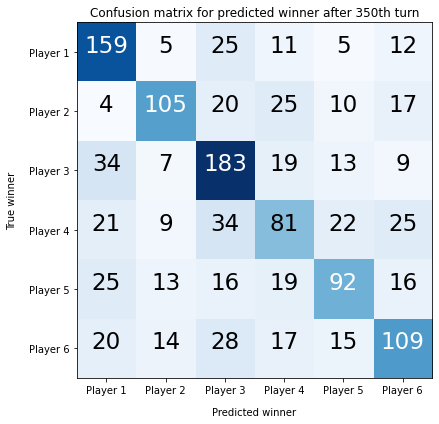

400th turn dataset:
Train on 3076 samples, validate on 770 samples
Epoch 1/30
3076/3076 [==============================] - 0s 70us/step - loss: 18.7410 - accuracy: 0.1954 - val_loss: 18.6013 - val_accuracy: 0.1948
Epoch 2/30
3076/3076 [==============================] - 0s 24us/step - loss: 17.6951 - accuracy: 0.1973 - val_loss: 17.5679 - val_accuracy: 0.1948
Epoch 3/30
3076/3076 [==============================] - 0s 21us/step - loss: 16.6673 - accuracy: 0.1986 - val_loss: 16.5533 - val_accuracy: 0.1961
Epoch 4/30
3076/3076 [==============================] - 0s 23us/step - loss: 15.6848 - accuracy: 0.1983 - val_loss: 15.5907 - val_accuracy: 0.1987
Epoch 5/30
3076/3076 [==============================] - 0s 20us/step - loss: 14.7501 - accuracy: 0.1983 - val_loss: 14.6777 - val_accuracy: 0.2026
Epoch 6/30
3076/3076 [==============================] - 0s 19us/step - loss: 13.8634 - accuracy: 0.1970 - val_loss: 13.8199 - val_accuracy: 0.2065
Epoch 7/30
3076/3076 [=============================

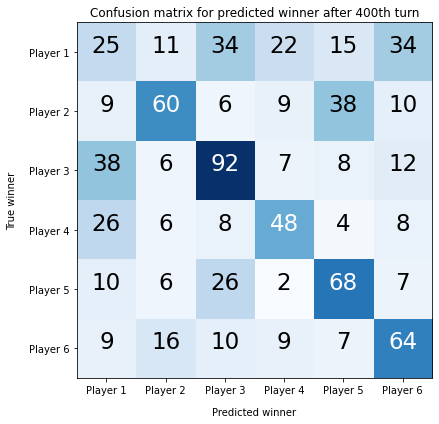

450th turn dataset:
Train on 1847 samples, validate on 462 samples
Epoch 1/30
1847/1847 [==============================] - 0s 106us/step - loss: 20.6225 - accuracy: 0.1576 - val_loss: 20.3926 - val_accuracy: 0.1753
Epoch 2/30
1847/1847 [==============================] - 0s 25us/step - loss: 19.9794 - accuracy: 0.1565 - val_loss: 19.7457 - val_accuracy: 0.1753
Epoch 3/30
1847/1847 [==============================] - 0s 22us/step - loss: 19.3487 - accuracy: 0.1532 - val_loss: 19.1123 - val_accuracy: 0.1775
Epoch 4/30
1847/1847 [==============================] - 0s 24us/step - loss: 18.7373 - accuracy: 0.1527 - val_loss: 18.4819 - val_accuracy: 0.1775
Epoch 5/30
1847/1847 [==============================] - 0s 22us/step - loss: 18.1235 - accuracy: 0.1548 - val_loss: 17.8770 - val_accuracy: 0.1753
Epoch 6/30
1847/1847 [==============================] - 0s 24us/step - loss: 17.5298 - accuracy: 0.1565 - val_loss: 17.2709 - val_accuracy: 0.1732
Epoch 7/30
1847/1847 [============================

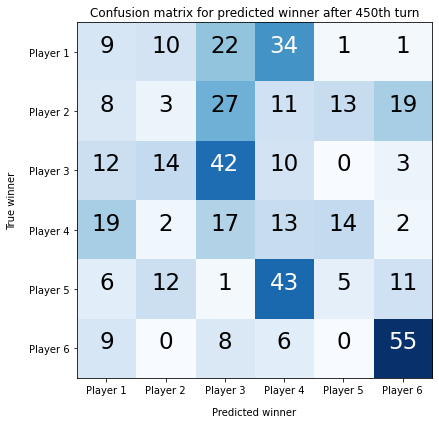

500th turn dataset:
Train on 1060 samples, validate on 265 samples
Epoch 1/30
1060/1060 [==============================] - 0s 185us/step - loss: 19.1802 - accuracy: 0.1377 - val_loss: 17.4864 - val_accuracy: 0.1396
Epoch 2/30
1060/1060 [==============================] - 0s 31us/step - loss: 18.8172 - accuracy: 0.1481 - val_loss: 17.1349 - val_accuracy: 0.1547
Epoch 3/30
1060/1060 [==============================] - 0s 25us/step - loss: 18.4677 - accuracy: 0.1557 - val_loss: 16.7942 - val_accuracy: 0.1698
Epoch 4/30
1060/1060 [==============================] - 0s 29us/step - loss: 18.1213 - accuracy: 0.1613 - val_loss: 16.4657 - val_accuracy: 0.1774
Epoch 5/30
1060/1060 [==============================] - 0s 25us/step - loss: 17.7865 - accuracy: 0.1642 - val_loss: 16.1414 - val_accuracy: 0.1849
Epoch 6/30
1060/1060 [==============================] - 0s 26us/step - loss: 17.4552 - accuracy: 0.1670 - val_loss: 15.8285 - val_accuracy: 0.1849
Epoch 7/30
1060/1060 [============================

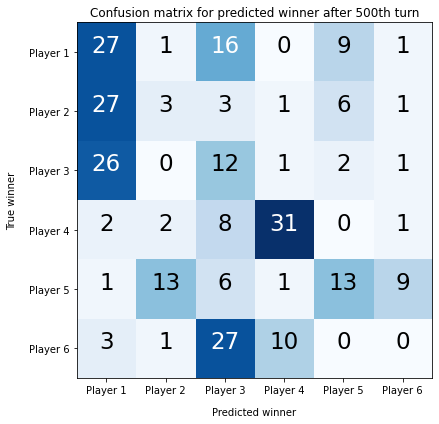

550th turn dataset:
Train on 586 samples, validate on 147 samples
Epoch 1/30
586/586 [==============================] - 0s 329us/step - loss: 14.8982 - accuracy: 0.2235 - val_loss: 13.3403 - val_accuracy: 0.2925
Epoch 2/30
586/586 [==============================] - 0s 31us/step - loss: 14.7185 - accuracy: 0.2287 - val_loss: 13.1784 - val_accuracy: 0.2925
Epoch 3/30
586/586 [==============================] - 0s 36us/step - loss: 14.5391 - accuracy: 0.2321 - val_loss: 13.0166 - val_accuracy: 0.2993
Epoch 4/30
586/586 [==============================] - 0s 31us/step - loss: 14.3649 - accuracy: 0.2338 - val_loss: 12.8542 - val_accuracy: 0.2993
Epoch 5/30
586/586 [==============================] - 0s 29us/step - loss: 14.1853 - accuracy: 0.2372 - val_loss: 12.6956 - val_accuracy: 0.2993
Epoch 6/30
586/586 [==============================] - 0s 31us/step - loss: 14.0122 - accuracy: 0.2372 - val_loss: 12.5361 - val_accuracy: 0.2993
Epoch 7/30
586/586 [==============================] - 0s 31us/s

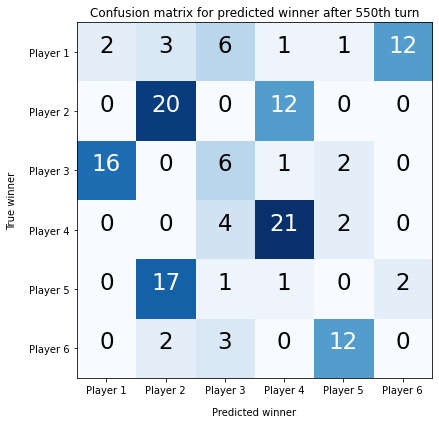

600th turn dataset:
Train on 276 samples, validate on 69 samples
Epoch 1/30
276/276 [==============================] - 0s 699us/step - loss: 21.0437 - accuracy: 0.1486 - val_loss: 20.7048 - val_accuracy: 0.1304
Epoch 2/30
276/276 [==============================] - 0s 43us/step - loss: 20.9132 - accuracy: 0.1522 - val_loss: 20.5979 - val_accuracy: 0.1449
Epoch 3/30
276/276 [==============================] - 0s 36us/step - loss: 20.7819 - accuracy: 0.1558 - val_loss: 20.4927 - val_accuracy: 0.1449
Epoch 4/30
276/276 [==============================] - 0s 33us/step - loss: 20.6575 - accuracy: 0.1594 - val_loss: 20.3901 - val_accuracy: 0.1449
Epoch 5/30
276/276 [==============================] - 0s 36us/step - loss: 20.5347 - accuracy: 0.1667 - val_loss: 20.2888 - val_accuracy: 0.1594
Epoch 6/30
276/276 [==============================] - 0s 47us/step - loss: 20.4134 - accuracy: 0.1667 - val_loss: 20.1884 - val_accuracy: 0.1739
Epoch 7/30
276/276 [==============================] - 0s 43us/st

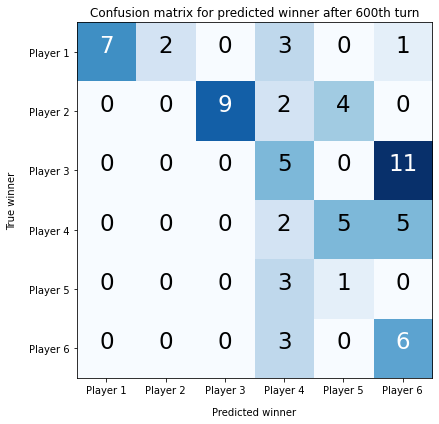

650th turn dataset:
Train on 99 samples, validate on 25 samples
Epoch 1/30
99/99 [==============================] - 0s 2ms/step - loss: 15.2030 - accuracy: 0.2222 - val_loss: 16.9609 - val_accuracy: 0.2800
Epoch 2/30
99/99 [==============================] - 0s 71us/step - loss: 15.1534 - accuracy: 0.2222 - val_loss: 16.9170 - val_accuracy: 0.2800
Epoch 3/30
99/99 [==============================] - 0s 61us/step - loss: 15.1034 - accuracy: 0.2222 - val_loss: 16.8745 - val_accuracy: 0.2800
Epoch 4/30
99/99 [==============================] - 0s 91us/step - loss: 15.0527 - accuracy: 0.2222 - val_loss: 16.8322 - val_accuracy: 0.3200
Epoch 5/30
99/99 [==============================] - 0s 61us/step - loss: 15.0039 - accuracy: 0.2323 - val_loss: 16.7897 - val_accuracy: 0.3200
Epoch 6/30
99/99 [==============================] - 0s 81us/step - loss: 14.9523 - accuracy: 0.2323 - val_loss: 16.7474 - val_accuracy: 0.3200
Epoch 7/30
99/99 [==============================] - 0s 71us/step - loss: 14.900

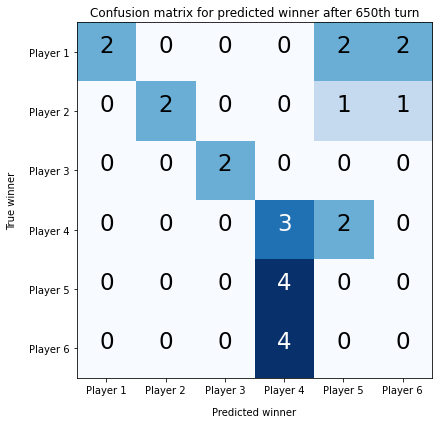

In [3]:
folder = "outlogs/nth turn datasets/"
num_players = 6
i_features = ['Player {} Africa', 'Player {} Asia', 'Player {} Australia', 'Player {} Europe', 'Player {} South America',
            'Player {} North America', 'Player {} Continental Reward', 'Player {} Country Count', 
            'Player {} Total Reinforcements', 'Player {} Troop Count', 'Player {} Troop Increase Due to Country Count',] 
features = []
for i in range(num_players):
    features = features + [feature.format(i) for feature in i_features]
targets = ["Player {} soft score".format(i) for i in range(num_players)]

def run_regression(w = 0.7, drop_ties=True):
    """ w is controls how much weight we assign to winning.
    If w is 0.7, then 1st place gets 0.7, 2nd place gets 0.7*(1-0.7) = 0.21 and so on
    """
    best_weights = []
    for nturn in range(200, 700, 50):
        if nturn == 250:
            #We don't have this data for some reason
            continue
        path = folder+"big_{}_turn.hdf".format(nturn)
        if drop_ties:
            data = pd.read_hdf(path)
        data = data.dropna() #drop stalemate games for now
        data[targets] = data[targets] ** -1
        data[targets] = (1-w)**(data[targets]-1)*(w**(data[targets] < num_players-0.1))
        #data[targets] = softmax(data[targets], axis=1) #convert to probabilities
        X = data.filter(items=features)
        y = data.filter(items=targets)
        #print(X.columns.values)
        #print(y.head())
        train_index, test_index = list(ShuffleSplit(n_splits=1, test_size=0.2).split(X))[0]
        X_train, X_test, y_train, y_test =  X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

        #Set up model
        input_dim = len(features)
        output_dim = num_players
        lnet = Sequential()
        dense = Dense(output_dim, input_dim=input_dim, activation='softmax', kernel_regularizer=l1_l2(l1=1e-4, l2=1e-3))
        lnet.add(dense)
        opt = keras.optimizers.Adam(learning_rate=1e-4)
        lnet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

        #train
        print(nturn,"th turn dataset:", sep='')
        lnet.fit(X_train, y_train, batch_size=64, epochs=30, verbose=1, validation_data=(X_test, y_test))
        pred_probs = lnet.predict(X_test)
        #TODO: if not drop_ties, don't use argmax
        y_true = np.argmax(y_test.values, axis=1) #use argsort to get all the positions instead of just winner
        y_pred = np.argmax(pred_probs, axis=1)
        cm = confusion_matrix(y_true, y_pred)

        #plot confusion matrix 
        plot_cm(cm, num_players, "Confusion matrix for predicted winner after {}th turn".format(nturn))

        weights = dense.get_weights()
        best_weights.append(weights)
        #print(weights)
run_regression()

200th turn dataset:
Train on 13085 samples, validate on 3272 samples
Epoch 1/30
13085/13085 [==============================] - 0s 37us/step - loss: 5.1089 - accuracy: 0.4010 - val_loss: 4.1390 - val_accuracy: 0.4092
Epoch 2/30
13085/13085 [==============================] - 0s 20us/step - loss: 3.5230 - accuracy: 0.4068 - val_loss: 3.1835 - val_accuracy: 0.4178
Epoch 3/30
13085/13085 [==============================] - 0s 25us/step - loss: 2.8998 - accuracy: 0.4190 - val_loss: 2.7646 - val_accuracy: 0.4349
Epoch 4/30
13085/13085 [==============================] - 0s 23us/step - loss: 2.5862 - accuracy: 0.4391 - val_loss: 2.5110 - val_accuracy: 0.4636
Epoch 5/30
13085/13085 [==============================] - 0s 20us/step - loss: 2.3739 - accuracy: 0.4639 - val_loss: 2.3222 - val_accuracy: 0.4817
Epoch 6/30
13085/13085 [==============================] - 0s 20us/step - loss: 2.2100 - accuracy: 0.4847 - val_loss: 2.1720 - val_accuracy: 0.4991
Epoch 7/30
13085/13085 [=========================

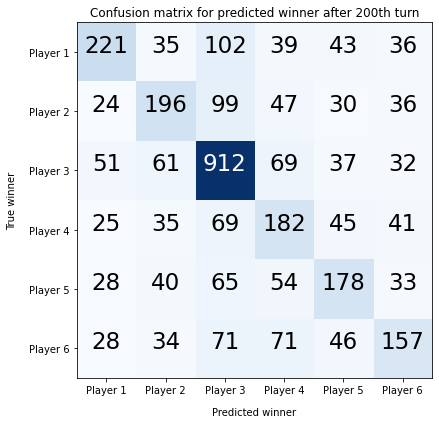

300th turn dataset:
Train on 7548 samples, validate on 1888 samples
Epoch 1/30
7548/7548 [==============================] - 0s 47us/step - loss: 16.8903 - accuracy: 0.2117 - val_loss: 14.8725 - val_accuracy: 0.2394
Epoch 2/30
7548/7548 [==============================] - 0s 22us/step - loss: 14.8506 - accuracy: 0.2250 - val_loss: 13.0266 - val_accuracy: 0.2516
Epoch 3/30
7548/7548 [==============================] - 0s 21us/step - loss: 13.0047 - accuracy: 0.2341 - val_loss: 11.3948 - val_accuracy: 0.2685
Epoch 4/30
7548/7548 [==============================] - 0s 21us/step - loss: 11.3615 - accuracy: 0.2402 - val_loss: 9.9785 - val_accuracy: 0.2744
Epoch 5/30
7548/7548 [==============================] - 0s 21us/step - loss: 9.9538 - accuracy: 0.2573 - val_loss: 8.7859 - val_accuracy: 0.2855
Epoch 6/30
7548/7548 [==============================] - 0s 21us/step - loss: 8.7493 - accuracy: 0.2715 - val_loss: 7.7499 - val_accuracy: 0.2982
Epoch 7/30
7548/7548 [==============================] -

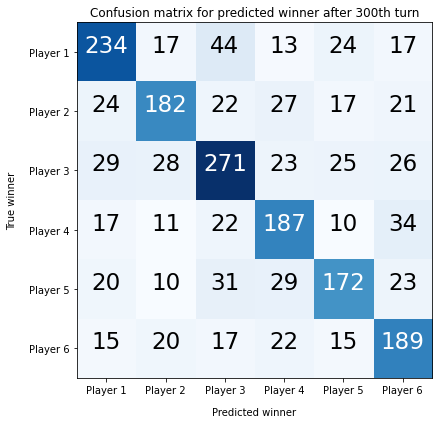

350th turn dataset:
Train on 4953 samples, validate on 1239 samples
Epoch 1/30
4953/4953 [==============================] - 0s 71us/step - loss: 14.7834 - accuracy: 0.2651 - val_loss: 13.3638 - val_accuracy: 0.2849
Epoch 2/30
4953/4953 [==============================] - 0s 24us/step - loss: 13.4687 - accuracy: 0.2831 - val_loss: 12.1982 - val_accuracy: 0.3002
Epoch 3/30
4953/4953 [==============================] - 0s 49us/step - loss: 12.3016 - accuracy: 0.2930 - val_loss: 11.1753 - val_accuracy: 0.3140
Epoch 4/30
4953/4953 [==============================] - 0s 23us/step - loss: 11.2903 - accuracy: 0.2988 - val_loss: 10.2880 - val_accuracy: 0.3172
Epoch 5/30
4953/4953 [==============================] - 0s 19us/step - loss: 10.4021 - accuracy: 0.3103 - val_loss: 9.5050 - val_accuracy: 0.3220
Epoch 6/30
4953/4953 [==============================] - 0s 20us/step - loss: 9.6111 - accuracy: 0.3202 - val_loss: 8.7944 - val_accuracy: 0.3366
Epoch 7/30
4953/4953 [==============================]

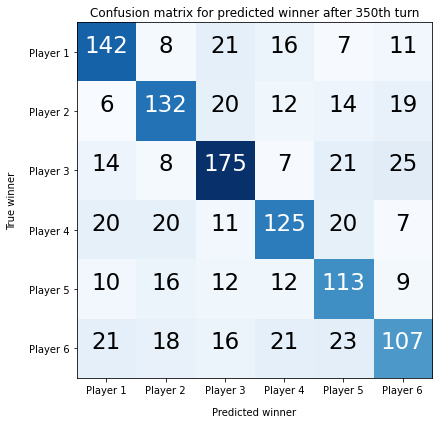

400th turn dataset:
Train on 3076 samples, validate on 770 samples
Epoch 1/30
3076/3076 [==============================] - 0s 95us/step - loss: 18.8024 - accuracy: 0.1508 - val_loss: 18.7077 - val_accuracy: 0.1623
Epoch 2/30
3076/3076 [==============================] - 0s 26us/step - loss: 17.8328 - accuracy: 0.1684 - val_loss: 17.7792 - val_accuracy: 0.1792
Epoch 3/30
3076/3076 [==============================] - 0s 24us/step - loss: 16.9341 - accuracy: 0.1834 - val_loss: 16.9034 - val_accuracy: 0.1935
Epoch 4/30
3076/3076 [==============================] - 0s 24us/step - loss: 16.0901 - accuracy: 0.1983 - val_loss: 16.0860 - val_accuracy: 0.2013
Epoch 5/30
3076/3076 [==============================] - 0s 23us/step - loss: 15.2933 - accuracy: 0.2103 - val_loss: 15.3074 - val_accuracy: 0.2195
Epoch 6/30
3076/3076 [==============================] - 0s 26us/step - loss: 14.5417 - accuracy: 0.2240 - val_loss: 14.5763 - val_accuracy: 0.2338
Epoch 7/30
3076/3076 [=============================

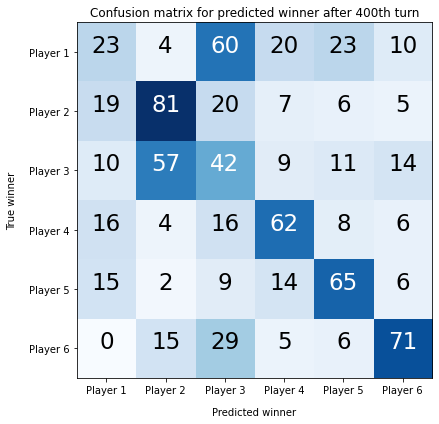

450th turn dataset:
Train on 1847 samples, validate on 462 samples
Epoch 1/30
1847/1847 [==============================] - 0s 143us/step - loss: 18.7706 - accuracy: 0.0715 - val_loss: 17.2517 - val_accuracy: 0.0844
Epoch 2/30
1847/1847 [==============================] - 0s 25us/step - loss: 18.0321 - accuracy: 0.0796 - val_loss: 16.5430 - val_accuracy: 0.0866
Epoch 3/30
1847/1847 [==============================] - 0s 25us/step - loss: 17.3233 - accuracy: 0.0883 - val_loss: 15.8635 - val_accuracy: 0.1017
Epoch 4/30
1847/1847 [==============================] - 0s 23us/step - loss: 16.6409 - accuracy: 0.0985 - val_loss: 15.2124 - val_accuracy: 0.1190
Epoch 5/30
1847/1847 [==============================] - 0s 23us/step - loss: 15.9843 - accuracy: 0.1050 - val_loss: 14.5912 - val_accuracy: 0.1342
Epoch 6/30
1847/1847 [==============================] - 0s 25us/step - loss: 15.3538 - accuracy: 0.1197 - val_loss: 14.0007 - val_accuracy: 0.1515
Epoch 7/30
1847/1847 [============================

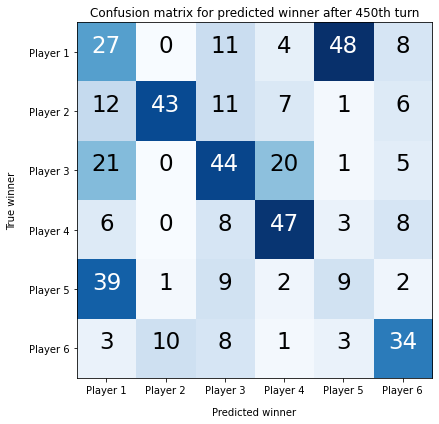

500th turn dataset:
Train on 1060 samples, validate on 265 samples
Epoch 1/30
1060/1060 [==============================] - 0s 241us/step - loss: 28.8600 - accuracy: 0.1113 - val_loss: 28.9109 - val_accuracy: 0.1019
Epoch 2/30
1060/1060 [==============================] - 0s 31us/step - loss: 28.3598 - accuracy: 0.1132 - val_loss: 28.3967 - val_accuracy: 0.1019
Epoch 3/30
1060/1060 [==============================] - 0s 31us/step - loss: 27.8660 - accuracy: 0.1151 - val_loss: 27.8831 - val_accuracy: 0.1019
Epoch 4/30
1060/1060 [==============================] - 0s 31us/step - loss: 27.3759 - accuracy: 0.1160 - val_loss: 27.3679 - val_accuracy: 0.1019
Epoch 5/30
1060/1060 [==============================] - 0s 30us/step - loss: 26.8848 - accuracy: 0.1179 - val_loss: 26.8566 - val_accuracy: 0.1019
Epoch 6/30
1060/1060 [==============================] - 0s 30us/step - loss: 26.3970 - accuracy: 0.1198 - val_loss: 26.3483 - val_accuracy: 0.1057
Epoch 7/30
1060/1060 [============================

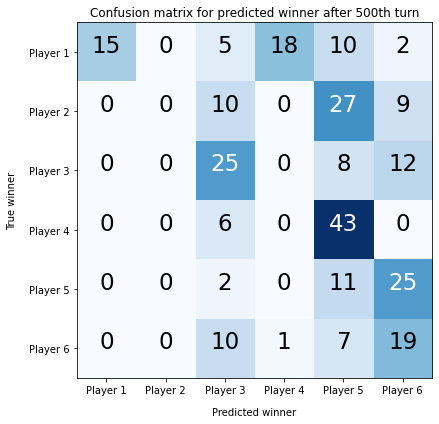

550th turn dataset:
Train on 586 samples, validate on 147 samples
Epoch 1/30
586/586 [==============================] - 0s 434us/step - loss: 20.2068 - accuracy: 0.1331 - val_loss: 21.4060 - val_accuracy: 0.1293
Epoch 2/30
586/586 [==============================] - 0s 40us/step - loss: 19.9318 - accuracy: 0.1365 - val_loss: 21.1350 - val_accuracy: 0.1293
Epoch 3/30
586/586 [==============================] - 0s 34us/step - loss: 19.6590 - accuracy: 0.1399 - val_loss: 20.8622 - val_accuracy: 0.1293
Epoch 4/30
586/586 [==============================] - 0s 36us/step - loss: 19.3896 - accuracy: 0.1399 - val_loss: 20.5895 - val_accuracy: 0.1293
Epoch 5/30
586/586 [==============================] - 0s 38us/step - loss: 19.1240 - accuracy: 0.1416 - val_loss: 20.3231 - val_accuracy: 0.1293
Epoch 6/30
586/586 [==============================] - 0s 34us/step - loss: 18.8573 - accuracy: 0.1416 - val_loss: 20.0602 - val_accuracy: 0.1293
Epoch 7/30
586/586 [==============================] - 0s 34us/s

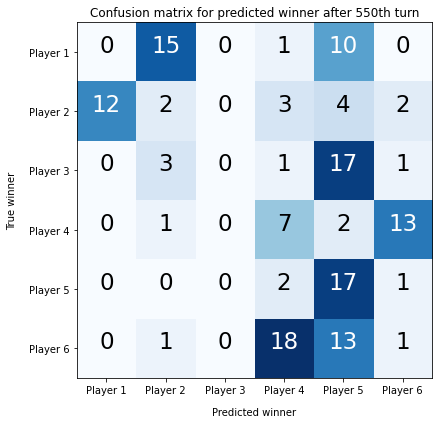

600th turn dataset:
Train on 276 samples, validate on 69 samples
Epoch 1/30
276/276 [==============================] - 0s 917us/step - loss: 28.9060 - accuracy: 0.1594 - val_loss: 27.7857 - val_accuracy: 0.0870
Epoch 2/30
276/276 [==============================] - 0s 49us/step - loss: 28.7554 - accuracy: 0.1594 - val_loss: 27.6320 - val_accuracy: 0.0870
Epoch 3/30
276/276 [==============================] - 0s 51us/step - loss: 28.5993 - accuracy: 0.1594 - val_loss: 27.4766 - val_accuracy: 0.0870
Epoch 4/30
276/276 [==============================] - 0s 47us/step - loss: 28.4403 - accuracy: 0.1594 - val_loss: 27.3198 - val_accuracy: 0.0870
Epoch 5/30
276/276 [==============================] - 0s 54us/step - loss: 28.2850 - accuracy: 0.1558 - val_loss: 27.1634 - val_accuracy: 0.0870
Epoch 6/30
276/276 [==============================] - 0s 54us/step - loss: 28.1264 - accuracy: 0.1558 - val_loss: 27.0088 - val_accuracy: 0.0870
Epoch 7/30
276/276 [==============================] - 0s 33us/st

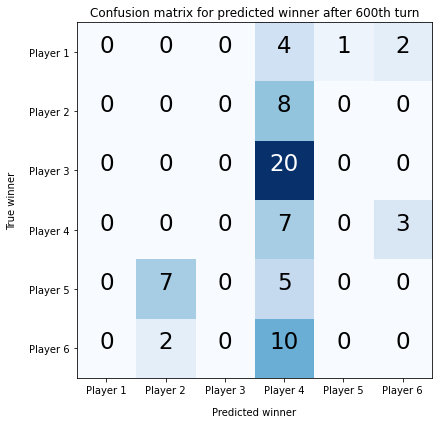

650th turn dataset:
Train on 99 samples, validate on 25 samples
Epoch 1/30
99/99 [==============================] - 0s 3ms/step - loss: 19.1549 - accuracy: 0.1515 - val_loss: 22.2945 - val_accuracy: 0.0400
Epoch 2/30
99/99 [==============================] - 0s 81us/step - loss: 19.1074 - accuracy: 0.1616 - val_loss: 22.2385 - val_accuracy: 0.0400
Epoch 3/30
99/99 [==============================] - 0s 81us/step - loss: 19.0621 - accuracy: 0.1616 - val_loss: 22.1812 - val_accuracy: 0.0400
Epoch 4/30
99/99 [==============================] - 0s 61us/step - loss: 19.0129 - accuracy: 0.1616 - val_loss: 22.1215 - val_accuracy: 0.0400
Epoch 5/30
99/99 [==============================] - 0s 61us/step - loss: 18.9614 - accuracy: 0.1616 - val_loss: 22.0612 - val_accuracy: 0.0400
Epoch 6/30
99/99 [==============================] - 0s 61us/step - loss: 18.9096 - accuracy: 0.1616 - val_loss: 22.0015 - val_accuracy: 0.0400
Epoch 7/30
99/99 [==============================] - 0s 61us/step - loss: 18.861

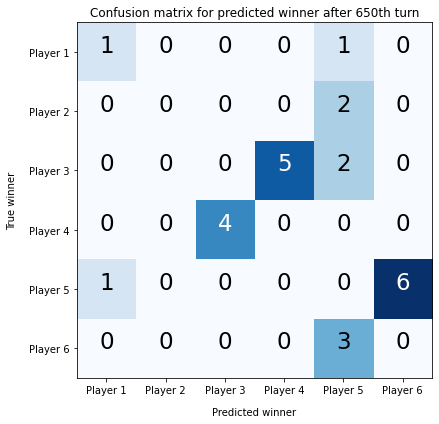

In [4]:
run_regression(w=0.9)